In [2]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 2.5 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

import wordcloud 
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [4]:
import string
from collections import Counter

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [5]:
data = pd.read_csv('Sentiment.csv')
# Keeping only the neccessary columns
data.head()
#data = data[['text','sentiment']]

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [6]:
data_new=data.head(1000)
data_new

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0000,yes,1.0000,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0000,yes,1.0000,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0000,yes,1.0000,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,No candidate mentioned,1.0000,yes,1.0000,Negative,0.3685,None of the above,1.0000,NaN,...,NaN,621,NaN,NaN,RT @nerdist: I gotta say it's refreshing to he...,NaN,2015-08-07 09:46:10 -0700,629695037094256640,"Phoenix, AZ, USA",Pacific Time (US & Canada)
996,997,No candidate mentioned,0.4298,yes,0.6556,Negative,0.3444,None of the above,0.4298,NaN,...,NaN,8,NaN,NaN,RT @GogoAleee: IG Deleted DD Account after we ...,NaN,2015-08-07 09:46:10 -0700,629695036385529856,NaN,Eastern Time (US & Canada)
997,998,No candidate mentioned,1.0000,yes,1.0000,Negative,1.0000,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @CrazyClarine: lol! RT @The3o5FlyGuy: Watch...,NaN,2015-08-07 09:46:09 -0700,629695034246451200,NaN,NaN
998,999,No candidate mentioned,0.4955,yes,0.7039,Negative,0.7039,None of the above,0.4955,NaN,...,NaN,107,NaN,NaN,RT @sjadetx: My thoughts on the #GOPDebate htt...,NaN,2015-08-07 09:46:08 -0700,629695028810485761,540,Atlantic Time (Canada)


In [8]:
datas=data_new[['id','text']]
datas

,id,text
0,1,RT @NancyLeeGrahn: How did everyone feel about...
1,2,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,3,RT @TJMShow: No mention of Tamir Rice and the ...
3,4,RT @RobGeorge: That Carly Fiorina is trending ...
4,5,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
...,...,...
995,996,RT @nerdist: I gotta say it's refreshing to he...
996,997,RT @GogoAleee: IG Deleted DD Account after we ...
997,998,RT @CrazyClarine: lol! RT @The3o5FlyGuy: Watch...
998,999,RT @sjadetx: My thoughts on the #GOPDebate htt...


In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harishsuresh/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harishsuresh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/harishsuresh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/harishsuresh/nltk_data...


True

In [17]:
fsen=[]
fval=[]
for i in datas.text:
    print('------------------------')
    lower_case = i.lower()
    cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
    #print(cleaned_text)
    tokenized_words = word_tokenize(cleaned_text, "english")
    final_words = []
    for word in tokenized_words:
        if word not in stopwords.words('english'):
            final_words.append(word)
    #print(final_words)
    lemma_words = []
    for word in final_words:
        word = WordNetLemmatizer().lemmatize(word)
        lemma_words.append(word)
    #print(lemma_words)
    h=[]
    for ir in lemma_words:
        if len(ir)>2:
            h.append(ir)
    #print(h)
    
    h1 = [word for word in h
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    #print(h1)
    
    h2=[]
    for i in h1:
        if '...' not in i:
            h2.append(i)
    #print(h2)
    
    f1=''
    for i in h2:
        f1=f1+' '+i
    print(f1)
    #print(type(f1))
    
            
    
    score = SentimentIntensityAnalyzer().polarity_scores(f1)
    
    if score['neg'] > score['pos']:
        val='Negative'
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        val='positive'
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")
        val='Neutral'
        
    fsen.append(f1)
    fval.append(val)
        
    
        
    
        
        

------------------------
 nancyleegrahn everyone feel climate change question last night exactly gopdebate
Neutral Sentiment
------------------------
 scottwalker didnt catch full gopdebate last night scott best line second walker16
Positive Sentiment
------------------------
 tjmshow mention tamir rice gopdebate held cleveland wow
Positive Sentiment
------------------------
 robgeorge carly fiorina trending hour debate men justcompleted gopdebate say shes
Neutral Sentiment
------------------------
 danscavino gopdebate realdonaldtrump delivered highest rating history presidential debate trump2016
Neutral Sentiment
------------------------
 gregabbotttx tedcruz first day rescind every illegal executive action taken barack obama gopdebate foxnews
Negative Sentiment
------------------------
 warriorwoman91 liked happy heard going moderator anymore gopdebate megynkelly
Positive Sentiment
------------------------
 going msnbc live thomasaroberts around gopdebate
Neutral Sentiment
---------

 cameronesposito ugh guy ever shut much respect woman gopdebate
Positive Sentiment
------------------------
 snarkydemo gopdebate teach future president trump america probably safe except attacked
Negative Sentiment
------------------------
 congoboy going long tiring election season shockingly illinformed candidate gopdebate
Negative Sentiment
------------------------
 amymek god blessed republican party many great candidate thedemocrats cant even find one marcorubio gopdebate
Positive Sentiment
------------------------
 johnkasich miracle happen grow opportunity grow job gopdebate
Positive Sentiment
------------------------
 mattyiceaz scott walker cant even carry state gopdebate
Neutral Sentiment
------------------------
 xlnb black people need anymore indication republican hate peep gopdebate
Negative Sentiment
------------------------
 smethanie sure god told run tooth fairy agreed teletubbies voted yes gopdebate
Positive Sentiment
------------------------
 palmaceiahome1 trump to

 mrskimcam trump said stupid let vote president wtf people gopdebate
Negative Sentiment
------------------------
 excited johnkasich gopdebate kasich4us republicandebate kasich2016 waiting year
Positive Sentiment
------------------------
 chadpergram rep engel 2nd major jewish democrat announce opposition iran deal gopdebate following schumer opposition
Neutral Sentiment
------------------------
 hey look feeling donald trump summed one gif gopdebate
Positive Sentiment
------------------------
 tommychong dude legalization marijuana gopdebate
Neutral Sentiment
------------------------
 cberesniova learned gopdebate guy dad mailman jesus christ everyones running mate gop run…
Neutral Sentiment
------------------------
 thebaxterbean marco rubio briefly backed immigration reform privately berated dreamer gopdebate
Positive Sentiment
------------------------
 damienfahey frenchkissed jesus christ every candidate gopdebate
Neutral Sentiment
------------------------
 gopdebate closingstatem

 megynkelly fox team talked minute gopdebate walker talked obvious goal ambush everyone pathetic
Negative Sentiment
------------------------
 johnamato actually agree andreatantaros something said realdonaldtrump didnt hurt gopdebate concur
Positive Sentiment
------------------------
 donniewahlberg like ben carson brain mike huckabees heart marco rubios soul chris christie fight john kasichs hope add carly fi…
Positive Sentiment
------------------------
 speed dating new president interesting article gopdebate
Positive Sentiment
------------------------
 bradbannon gop debate campaign preview rearview bradbannon linkedin uniteblue potus
Neutral Sentiment
------------------------
 dykstradame gopdebate like super crappy cage fight blustering bumbling old wrinkledup tuckus clincher without ca…
Positive Sentiment
------------------------
 govmikehuckabee military social experiment purpose military kill people break thing imwithhuck
Negative Sentiment
------------------------
 bennydiego 

 richarddeitsch frankbruni gopdebate writer top game
Positive Sentiment
------------------------
 pamelageller know rand strategy going trump got nothing lose nowhere anyway gopdebate
Positive Sentiment
------------------------
 credit credit due shocked shocked trump cogent health care debate response gopdebate
Positive Sentiment
------------------------
 pattonoswalt concludes debate please welcome koch brother choose ideological broodmare whorestab…
Positive Sentiment
------------------------
 colmorrisdavis amusing hear men chose serve military talk tough using people kid backup
Positive Sentiment
------------------------
 god going like copresident something gopdebate eleventhdebater
Positive Sentiment
------------------------
 redstatejake pay serious watch someone grill egomaniacal bully interview gopdebate kellyfile
Negative Sentiment
------------------------
 kind glad didnt get watch gopdebate yesterday better mental health
Positive Sentiment
------------------------
 biparti

 nerdist trump really great orange new orange gopdebate
Positive Sentiment
------------------------
 andreafed deblibby half republican base dementia probably found riveting confusing wthe toaster…
Negative Sentiment
------------------------
 afruen hillaryclinton watch train wreck gopdebate
Negative Sentiment
------------------------
 ninjaeconomics best drinking game gopdebate tonight
Positive Sentiment
------------------------
 pattonoswalt wait rand paul want marry gun saying thats dealbreaker still gopdebate
Negative Sentiment
------------------------
 joe flacco elite sign crash republican debatestill one know nfl gopdebate
Negative Sentiment
------------------------
 chrchcurmudgeon vote hologram calvin coolidge moonwalking across stage right gopdebate
Neutral Sentiment
------------------------
 thefriddle trump mexico rubio majority illegals arent mexican thats grandstanding understanding real issue look
Neutral Sentiment
------------------------
 gopdebate like super crappy ca

 good facebook logo debate last night otherwise brand awareness might suffered gopdebate
Negative Sentiment
------------------------
 megynkelly showed gopdebate biz moderator interviewer nothing else foxnews failed last night
Positive Sentiment
------------------------
 why retweeted comment gopdebate truthful anything gop candidate said
Positive Sentiment
------------------------
 learned cant watch gop bed nightmare gopdebate gopdebacle
Neutral Sentiment
------------------------
 foxnews brithume best closing statement realbencarsons gopdebate kellyfile agree
Positive Sentiment
------------------------
 oooh fox news also doesnt want trump president gopdebate
Negative Sentiment
------------------------
 mschmidtrtd gop leader praise debate performance trump much election2016 gopdebate
Positive Sentiment
------------------------
 gopdebate constant already committed candidate believe gored last night tcot
Positive Sentiment
------------------------
 yaleclimatecomm jerrybrowngov peep

 gopdebate interesting watch candidate good point economy change
Positive Sentiment
------------------------
 debate preformances kasich rubio carson christie trump bush cruz huckabee paul walker gopdebate kasich rubio
Neutral Sentiment
------------------------
 wndtxt trump man substancea fighterthe intellectual class never able understand hand person like tru…
Positive Sentiment
------------------------
 donald trump clash megyn kelly gopdebate video
Neutral Sentiment
------------------------
 phillyd went gay wedding applause black people standing ovation gopdebate
Positive Sentiment
------------------------
 gopdebate realdonaldtrump still twitter loosing ground
Neutral Sentiment
------------------------
 kumailn military reason fuck shit gopdebate
Negative Sentiment
------------------------
 joshtpm gopdebate money cant buy love trump quote
Negative Sentiment
------------------------
 writeintrump jeb bush refers vito corleone always thought fredo gopdebate
Neutral Sentiment
-----

 nerdist got say refreshing hear presidential debate everyone correctly pronouncing nuclear gopdebate
Neutral Sentiment
------------------------
 gogoaleee deleted account participated kkkorgop hashtag gopdebate via dream…
Neutral Sentiment
------------------------
 crazyclarine lol the3o5flyguy watching gopdebate like
Positive Sentiment
------------------------
 sjadetx thought gopdebate
Neutral Sentiment
------------------------
 freedomtexasmom love megynkelly died tonight gopdebate foxnews trumpcruz2016 makeamericagreatagain
Positive Sentiment


In [18]:
fsen

[' nancyleegrahn everyone feel climate change question last night exactly gopdebate',
 ' scottwalker didnt catch full gopdebate last night scott best line second walker16',
 ' tjmshow mention tamir rice gopdebate held cleveland wow',
 ' robgeorge carly fiorina trending hour debate men justcompleted gopdebate say shes',
 ' danscavino gopdebate realdonaldtrump delivered highest rating history presidential debate trump2016',
 ' gregabbotttx tedcruz first day rescind every illegal executive action taken barack obama gopdebate foxnews',
 ' warriorwoman91 liked happy heard going moderator anymore gopdebate megynkelly',
 ' going msnbc live thomasaroberts around gopdebate',
 ' deer headlight lizzwinstead ben carson may brain surgeon performed lobotomy gopdebate',
 ' nancyosborne180 last night debate proved gopdebate batsask badassteachersa tbats',
 ' jgreendc realdonaldtrump fairness billclinton owns phrasegopdebate',
 ' waynedupreeshow woke tweet gopdebate best line night via govmikehuckabee'

In [19]:
fval

['Neutral',
 'positive',
 'positive',
 'Neutral',
 'Neutral',
 'Negative',
 'positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'Negative',
 'Negative',
 'Neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'Negative',
 'Neutral',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'positive',
 'positive',
 'Negative',
 'Negative',
 'Neutral',
 'Neutral',
 'Negative',
 'positive',
 'positive',
 'Negative',
 'Negative',
 'positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'positive',
 'Negative',
 'Neutral',
 'positive',
 'Neutral',
 'positive',
 'Negative',
 'positive',
 'Neutral',
 'Negative',
 'Negative',
 'positive',
 'positive',
 'Negative',
 'Negative',
 'positive',
 'Negative',
 'Neutral',
 'Negative',
 'positive',
 'positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'Neutral',
 'Negative',
 'positive',
 'positive',
 'Neutral',
 'Negativ

In [20]:
df = pd.DataFrame(list(zip(fsen,fval)),
               columns =['Sentence', 'Sentiment'])
df

,Sentence,Sentiment
0,nancyleegrahn everyone feel climate change qu...,Neutral
1,scottwalker didnt catch full gopdebate last n...,positive
2,tjmshow mention tamir rice gopdebate held cle...,positive
3,robgeorge carly fiorina trending hour debate ...,Neutral
4,danscavino gopdebate realdonaldtrump delivere...,Neutral
...,...,...
995,nerdist got say refreshing hear presidential ...,Neutral
996,gogoaleee deleted account participated kkkorg...,Neutral
997,crazyclarine lol the3o5flyguy watching gopdeb...,positive
998,sjadetx thought gopdebate,Neutral


In [21]:
ncount=0
pcount=0
ecount=0
for i in df.Sentiment:
    #print(i)
    if i=='Negative':
        ncount=ncount+1
    elif i=='positive':
        pcount=pcount+1
    else:
        ecount=ecount+1
        
print('positive :',pcount,'\n','Negative :',ncount,'\n','Neutral :',ecount)

positive : 425 
 Negative : 311 
 Neutral : 264


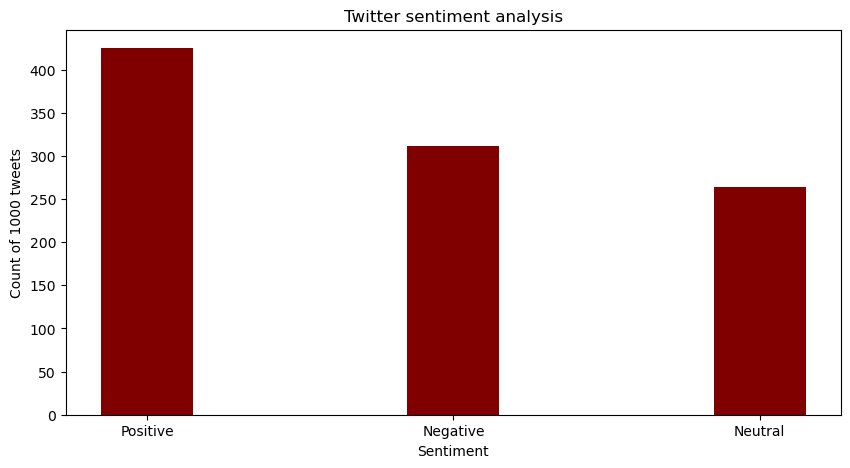

In [22]:
senti=['Positive','Negative','Neutral']
count=[pcount,ncount,ecount]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(senti, count, color ='maroon',
        width = 0.3)
 
plt.xlabel("Sentiment")
plt.ylabel("Count of 1000 tweets")
plt.title("Twitter sentiment analysis")
plt.show()

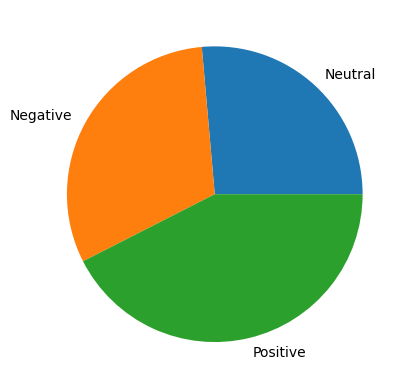

In [23]:
y = np.array([ecount,ncount,pcount])
mylabels = ["Neutral", "Negative", "Positive"]

plt.pie(y, labels = mylabels)
plt.show() 

In [24]:
dfneg=df.loc[df.Sentiment=='Negative']
dfneg

,Sentence,Sentiment
5,gregabbotttx tedcruz first day rescind every ...,Negative
15,hey chrischristie exploiting tragedy 911 poli...,Negative
16,carolcnn donaldtrump fire comment woman peter...,Negative
22,erinmallorylong hate planned parenthood woman...,Negative
24,mrpooni fox news trying convince young black ...,Negative
...,...,...
977,ccalbos huckabee military kill people break t...,Negative
980,realdonaldtrumps arrogance gopdebate used law...,Negative
982,real scary liberal allowed walk around commit...,Negative
985,numbersmuncher donald trump guy flip risk boa...,Negative


In [25]:
dfpos=df.loc[df.Sentiment=='positive']
dfpos

,Sentence,Sentiment
1,scottwalker didnt catch full gopdebate last n...,positive
2,tjmshow mention tamir rice gopdebate held cle...,positive
6,warriorwoman91 liked happy heard going modera...,positive
11,waynedupreeshow woke tweet gopdebate best lin...,positive
12,reading family comment great gopdebate,positive
...,...,...
991,ljcambria realdonaldtrump dont forget vote es...,positive
992,recap gopdebate tenmen want make choice woman...,positive
993,writeintrump made hillary clinton wedding als...,positive
997,crazyclarine lol the3o5flyguy watching gopdeb...,positive


In [26]:
dfneu=df.loc[df.Sentiment=='Neutral']
dfneu

,Sentence,Sentiment
0,nancyleegrahn everyone feel climate change qu...,Neutral
3,robgeorge carly fiorina trending hour debate ...,Neutral
4,danscavino gopdebate realdonaldtrump delivere...,Neutral
7,going msnbc live thomasaroberts around gopdebate,Neutral
8,deer headlight lizzwinstead ben carson may br...,Neutral
...,...,...
981,hour later looking back biggest gaffe gopdeba...,Neutral
988,donald trump democratic spy realdonaldtrump s...,Neutral
995,nerdist got say refreshing hear presidential ...,Neutral
996,gogoaleee deleted account participated kkkorg...,Neutral


In [27]:
dfp=dfpos['Sentence']
dfn=dfneg['Sentence']
dfe=dfneu['Sentence']


Positive words


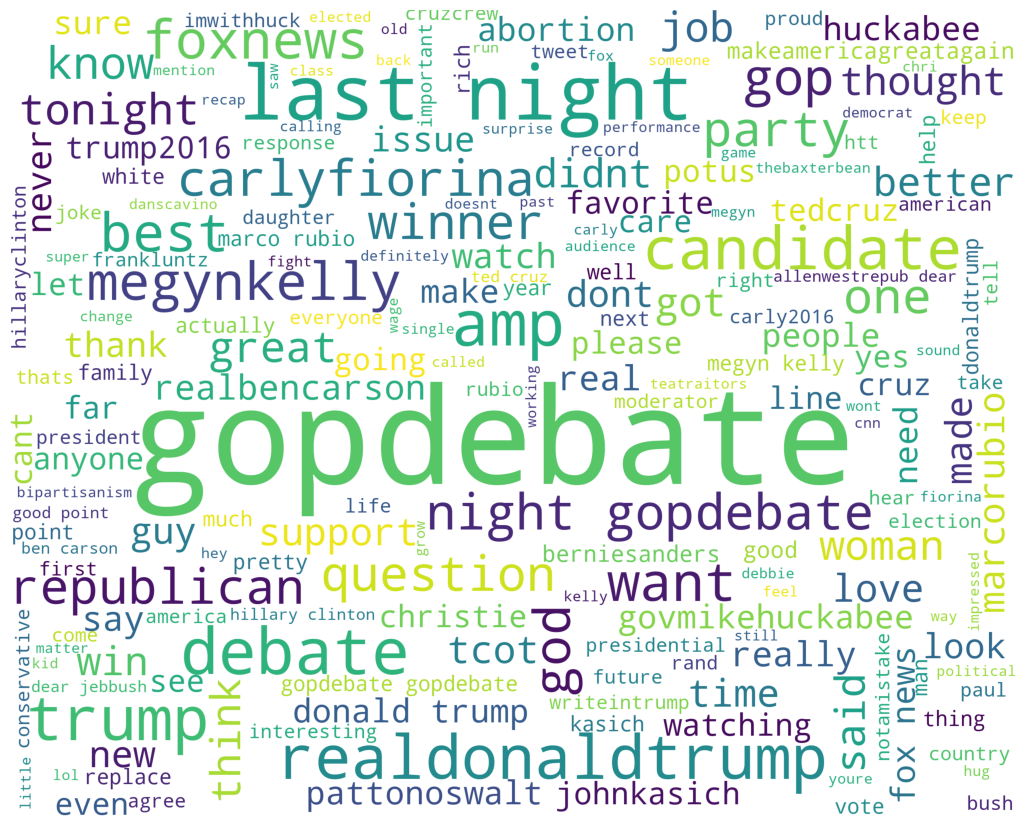

In [28]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(dfp,'white')


Negative words


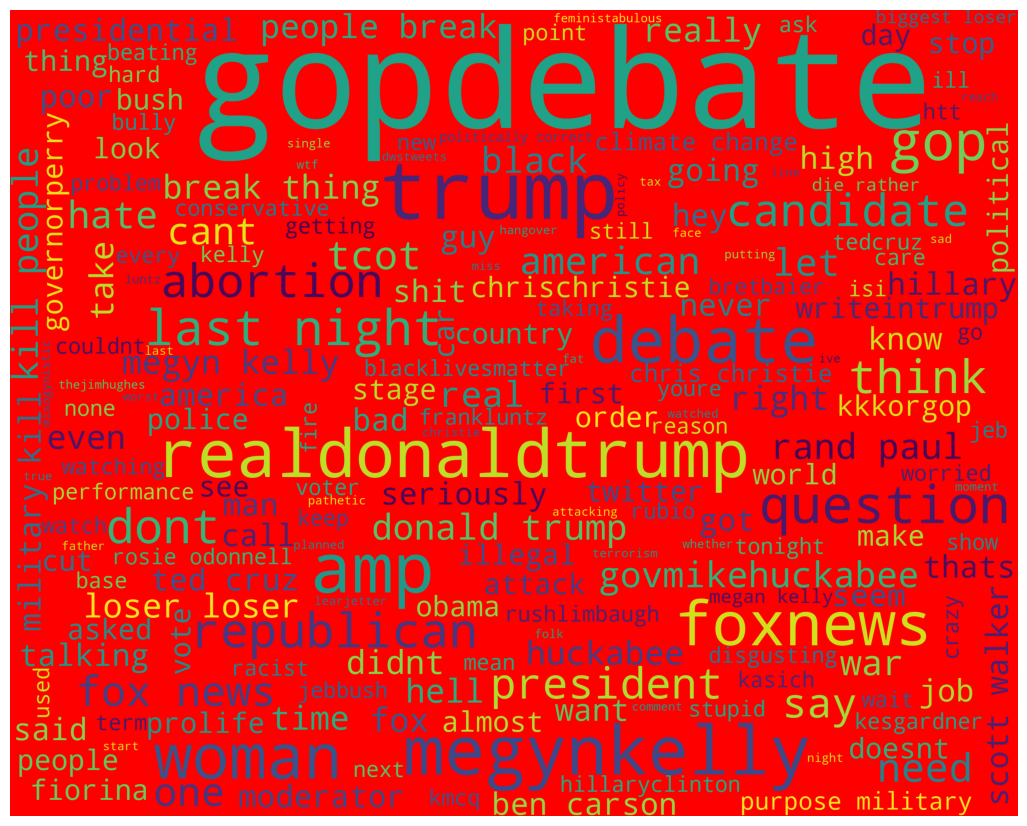

In [29]:
print("Negative words")
wordcloud_draw(dfn,'red')


Neutral words


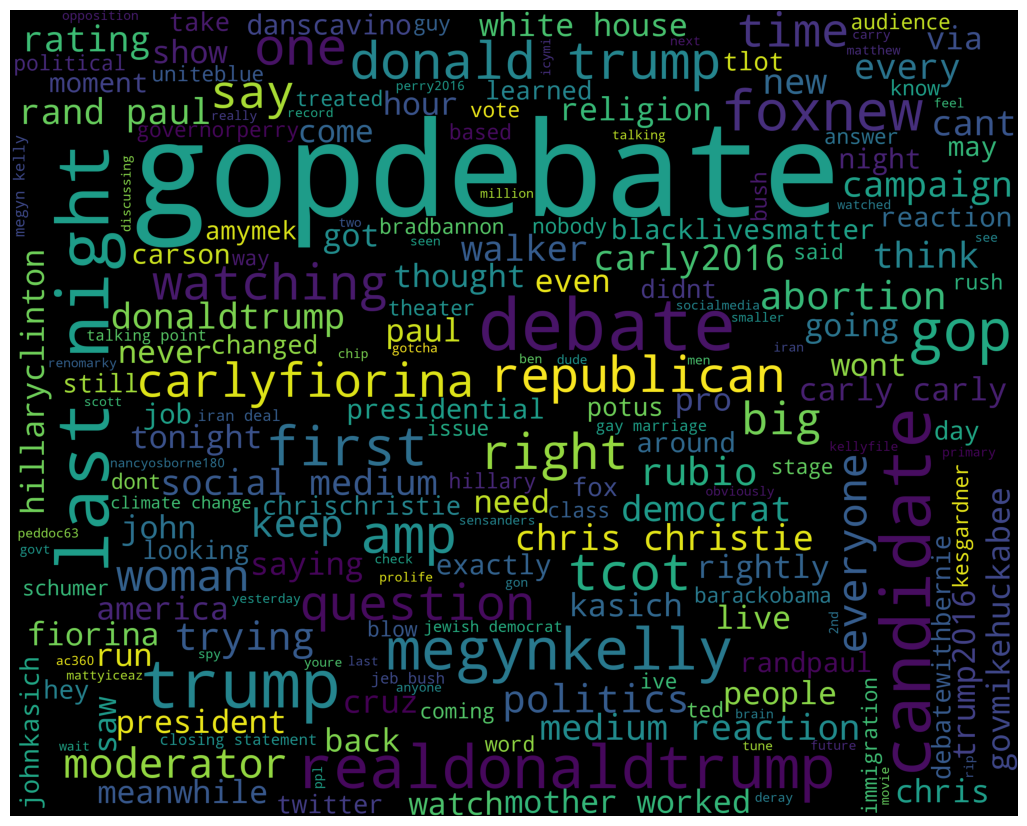

In [30]:
print("Neutral words")
wordcloud_draw(dfe)

In [31]:
import tkinter as tk


In [32]:
master = tk.Tk()


In [33]:
master.title("SENTIMENT ANALYSIS")


''

In [34]:
master.geometry("700x250")


''

In [35]:
e1 = tk.Entry(master)
e2 = tk.Entry(master)

In [37]:
import tkinter as tk
from tkinter import ttk

# root window
root = tk.Tk()
root.geometry('300x200')
root.resizable(False, False)
root.title('Button Demo')

# exit button
exit_button = ttk.Button(
    root,
    text='Exit',
    command=lambda: root.quit()
)

exit_button.pack(
    ipadx=5,
    ipady=5,
    expand=True
)

root.mainloop()